In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.integrate import odeint, solve_ivp

plt.style.use('bmh')

# First Order ODEs

$$ \frac{dv}{dt} - \alpha v^2 + \beta = 0 \quad v(0)=0 $$
$$ \frac{dv}{dt} = f(t,v) $$
$$ \frac{dv}{dt} = \alpha v^2 - \beta $$

In [2]:
def dvdt(t, v): return 3*(v**2) - 5
v0 = 0
t = np.linspace(0, 1, 100)

In [3]:
# use odeint --> retunr numpy.array

sol_1 = odeint(dvdt, v0, t, tfirst=True)
print(type(sol_1), sol_1.shape)

<class 'numpy.ndarray'> (100, 1)


In [4]:
# use solve_ivp

sol_2 = solve_ivp(dvdt, t_span=(0, max(t)), y0=[v0], t_eval=t)
sol_2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061,

In [5]:
sol_2.y.shape

(1, 100)

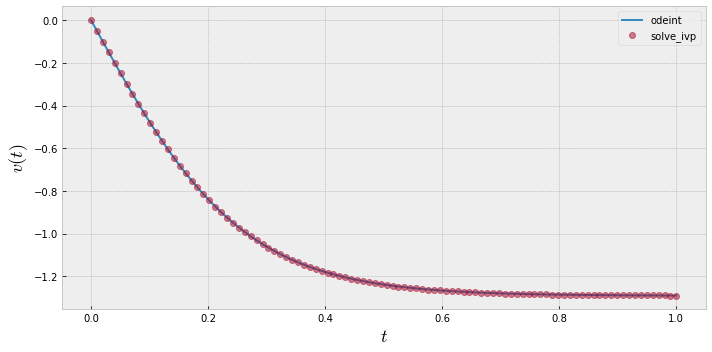

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(t, sol_1.flatten(), label='odeint')
ax.plot(t, sol_2.y.flatten(), marker='o', linestyle='', label='solve_ivp', alpha=0.5)
ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$v(t)$', fontsize=18)
ax.legend()

plt.tight_layout()
plt.show()

# Coupled first order ODEs

$$ y_{1}^{'} = y_{1} + y_{2}^{2} + 3x \quad y_1(0)=0 $$
$$ y_{2}^{'} = 3y_{1} + y_{2}^{3} - \cos(x) \quad y_2(0)=0 $$

$$\vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}
\quad \Longrightarrow \quad
\frac{d\vec{S}}{dx} = 
\begin{bmatrix} y_{1}^{'} \\ y_{2}^{'} \end{bmatrix} =
\begin{bmatrix} y_{1} + y_{2}^{2} + 3x  \\ 3y_{1} + y_{2}^{3} - \cos(x)\end{bmatrix}
$$

In [7]:
def dSdx(x, S):
    y1, y2 = S
    y1_d = y1 + y2**2 + 3*x
    y2_d = 3*y1 + y2**2 - np.cos(x)
    
    return (y1_d, y2_d)

S0 = (0, 0)

In [8]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S0, x, tfirst=True)

In [9]:
sol.shape

(100, 2)

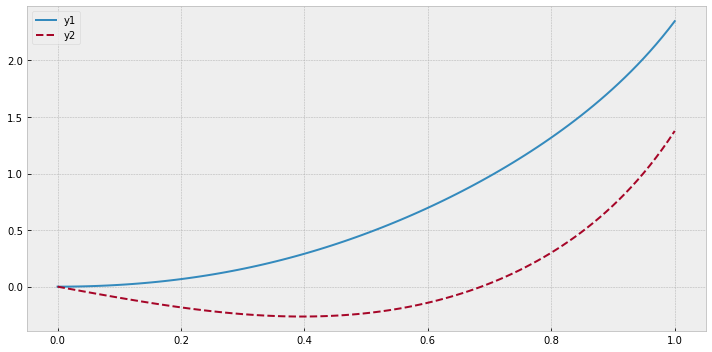

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, sol[:,0], label='y1')
ax.plot(x, sol[:,1], label='y2', linestyle='--')
ax.legend()

plt.tight_layout()
plt.show()

# Second Order ODEs

$$ \ddot{x} = -\dot{x}^{2} + \sin(x)$$
convert into two first order ODEs <br>
$$ \dot{x} = v $$
$$ \dot{v} = -v^2 + \sin(x) $$

In [11]:
def dSdx(x, S):
    x, v = S
    x_diff = v
    v_diff = -v**2 + np.sin(x)
    
    return (x_diff, v_diff)

S0 = (0, 5)

In [12]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S0, x, tfirst=True)

In [13]:
sol.shape

(100, 2)

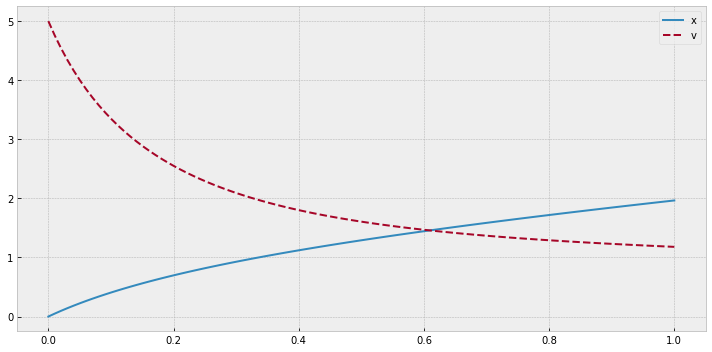

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, sol[:,0], label='x')
ax.plot(x, sol[:,1], label='v', linestyle='--')
ax.legend()

plt.tight_layout()
plt.show()

# Third Order ODEs

$$ \dddot{x_2} = -\ddot{x_1}^3 + \dot{x_2} + x_1 + \sin(t) $$
$$ \dddot{x_1} = -2\dot{x_2}^2 + x_2 $$
Define <br>
* $v_1 = \dot{x_1}$
* $v_2 = \dot{x_2}$
* $a_1 = \ddot{x_1} = \dot{v_1}$
* $a_2 = \ddot{x_2} = \dot{v_2}$

$$ \vec{S} = \begin{bmatrix} x_1 \\ v_1 \\a_1 \\ x_2 \\v_2 \\a_2 \end{bmatrix} 
\quad \Longrightarrow \quad 
\frac{d\vec{S}}{dt} = 
\begin{bmatrix} \dot{x_1} \\ \dot{v_1} \\ \dot{a_1} \\ \dot{x_2} \\ \dot{v_2} \\ \dot{a_2} \end{bmatrix} =
\begin{bmatrix} v_1 \\ a_1 \\ -2v_2^2 + x_2 \\ v_2 \\ a_2 \\ -a_1^3 + v_2 + x_1 + \sin(t) \end{bmatrix}$$

In [15]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1,
            a1,
            -2*v2**2 + x2,
            v2,
            a2,
            -a1**3 + v2 + v1 + np.sin(t)]
x1_0 = 0
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
v_0 = 0
S_0 = (x1_0, v1_0, a1_0, x1_0, v1_0, a1_0)

In [16]:
t = np.linspace(0, 1, 100)
sols = odeint(dSdt, S_0, t, tfirst=True)

In [17]:
sols.shape

(100, 6)

In [18]:
x1_sol = sols[:,0]
x2_sol = sols[:,3]

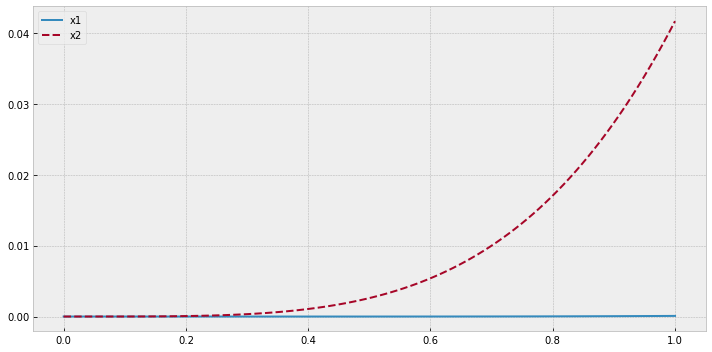

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(t, x1_sol, label='x1')
ax.plot(t, x2_sol, label='x2', linestyle='--')
ax.legend()

plt.tight_layout()
plt.show()